In [91]:
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# Generate 3 dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[1, 1, 1], [2, 2, 2], [-1, -1, -1], [-2, -2, -2], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        if i < 2:
            t = np.linspace(0, 2 * np.pi, 1000) + i * np.pi / 5
            x = np.sin(t) * t
            y_ = np.cos(t) * t
            z = np.zeros(1000)  # Add a third dimension filled with zeros
            X_class = np.column_stack((x, y_, z))
        elif i < 4:
            X_class = np.random.multivariate_normal(means[i], covs[i], 1000)
        elif i < 6:
            x, y_, z = np.random.randn(3, 1000)
            X_class = np.column_stack((x, y_, z))
        elif i < 8:
            X_class = np.random.randn(1000, 3)
        else:
            x, y_, z = np.random.randn(3, 1000) * 2
            X_class = np.column_stack((x, y_, z))
        if i == 0:
            X = X_class
            y = np.array([i] * 1000)
        else:
            X = np.concatenate((X, X_class), axis=0)
            y = np.concatenate((y, np.array([i] * 1000)), axis=0)
    return X, y
	



In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    plt.show()


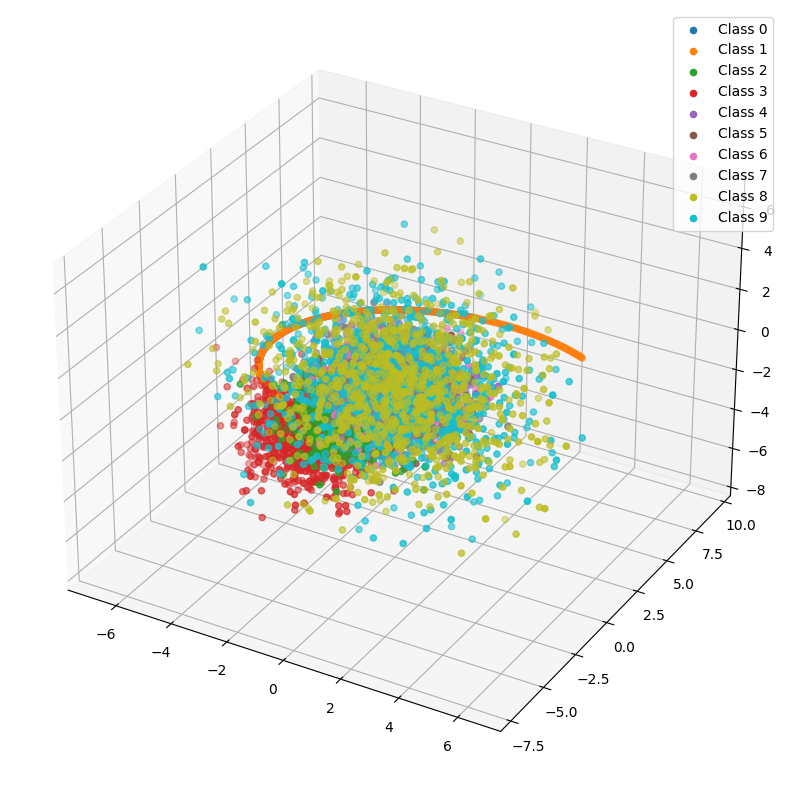

In [93]:
(x, y) = generate_dataset()
plot_dataset(x, y)

In [94]:
# Keras model class
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [95]:
# Train the model
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [96]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [97]:
def plot_classification_results(X, y, model):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    plt.show()

In [98]:
# Main function
def experiment(num_layers=3, neurons_per_layer=64, activation='relu', epochs=100):
    X, y = generate_dataset()
    plot_dataset(X, y)

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    optimizer = Adam(lr=0.001)
    history = train(X, y, model, optimizer, epochs)
    plot_history(history)

    plot_classification_results(X, y, model)

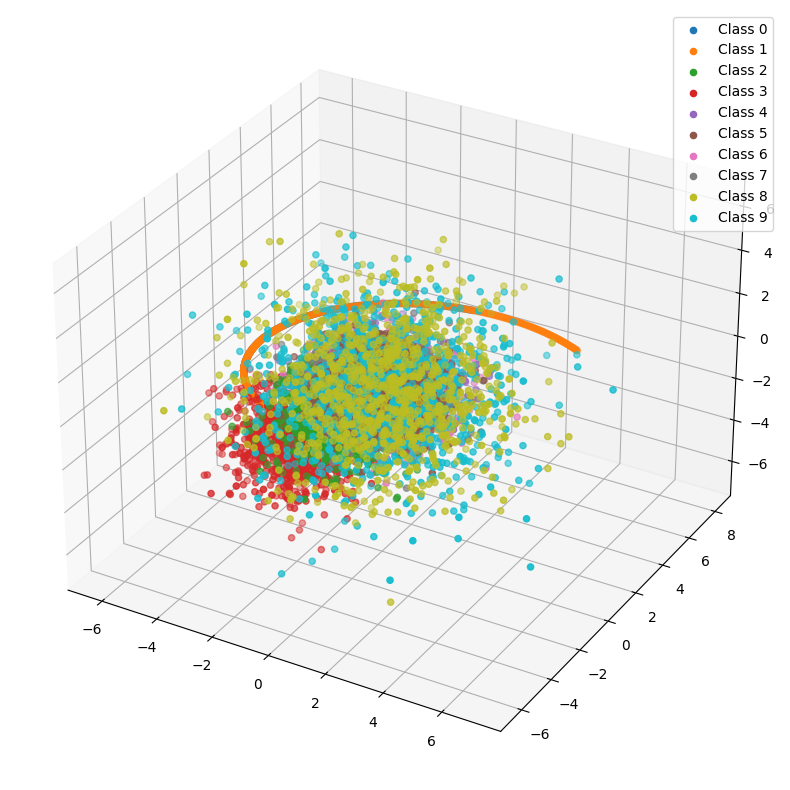

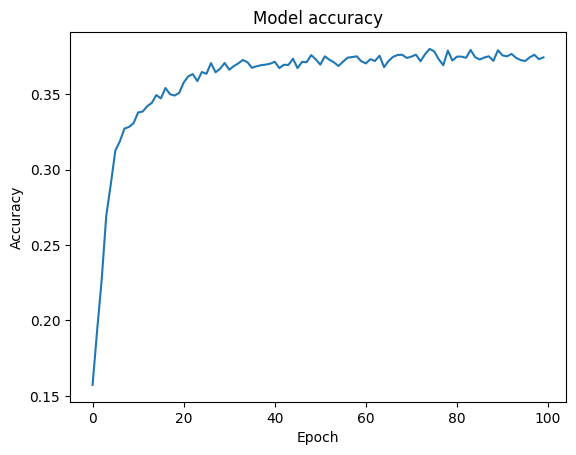

313/313 [==============================] - 1s 2ms/step


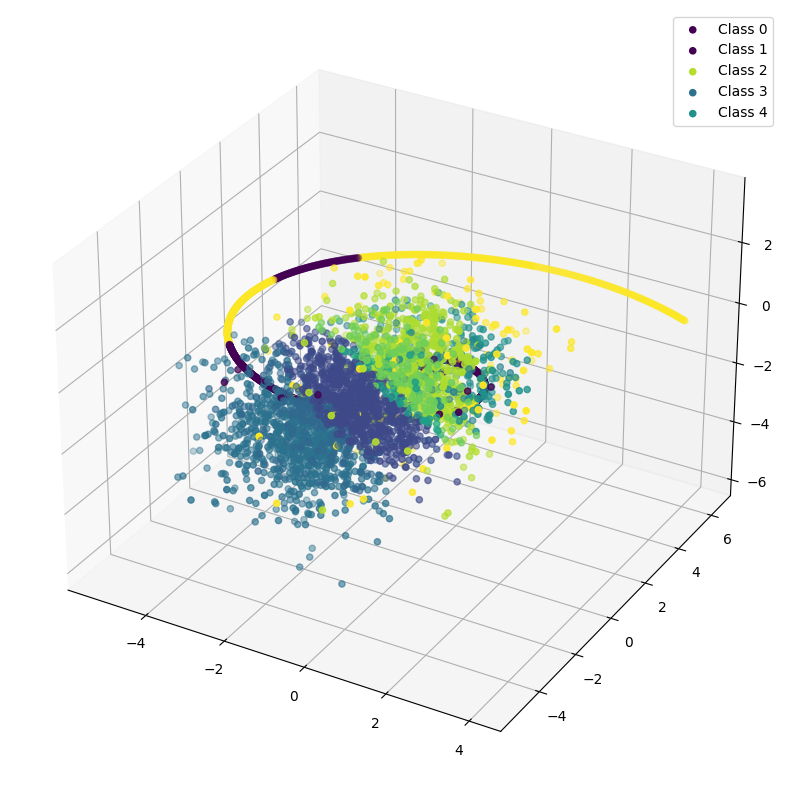

In [99]:
experiment(4, 6)